# Stat106 Project Milestone 2



**ATP Tennis**

Kenny Chen | Matan Roet | Jack Pinnell

In [ ]:
install.packages("ggcorrplot")
install.packages("Hmisc")
install.packages("randomForest")
install.packages("factoextra")
library(Hmisc)
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggcorrplot)
library(factoextra)
install.packages("elo", version = "4.0.2")
library(elo)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggcorrplot"):
“installation of package ‘ggcorrplot’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")
install.packages9("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in install.packages9("caret"): could not find function "install.packages9"


In [ ]:
data = read.csv("atp_matches_with_features.csv")

In [ ]:
head(data)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_rolling_10_2ndWon_per_svgm,l_rolling_10_SvGms,l_rolling_10_bpSaved_per_svgm,l_rolling_10_bpSaved_per_bpFaced_per_svgm,l_rolling_10_bpFaced_per_svgm,l_rolling_10_rank,l_rolling_10_ht,l_rolling_10_age,w_previous_wins,l_previous_wins
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1991-354,Wellington,Hard,32,A,1990-12-31,20,100752,NA,,⋯,1.0000000,9.00000,0.2222222,0.03703704,0.6666667,43,183,27.3,0,0
2,1991-339,Adelaide,Hard,32,A,1990-12-31,30,101529,6,,⋯,1.4363636,10.66667,0.0969697,0.02676768,0.2545455,25,185,20.3,0,0
3,1991-339,Adelaide,Hard,32,A,1990-12-31,29,101900,NA,,⋯,1.3994949,12.66667,0.2242424,0.05187590,0.3676768,56,193,20.7,0,0
4,1991-339,Adelaide,Hard,32,A,1990-12-31,28,101793,2,,⋯,1.1333333,12.50000,0.1833333,0.03333333,0.4166667,111,180,22.8,0,0
5,1991-339,Adelaide,Hard,32,A,1990-12-31,27,101529,6,,⋯,0.8504274,11.00000,0.4871795,0.06364469,0.7136752,60,175,26.3,0,0
6,1991-339,Adelaide,Hard,32,A,1990-12-31,26,101900,NA,,⋯,1.1666667,10.00000,0.2291667,0.03263889,0.7500000,62,178,18.0,0,0


In [ ]:
str(data)

'data.frame':	90323 obs. of  77 variables:
 $ tourney_id                               : chr  "1991-354" "1991-339" "1991-339" "1991-339" ...
 $ tourney_name                             : chr  "Wellington" "Adelaide" "Adelaide" "Adelaide" ...
 $ surface                                  : chr  "Hard" "Hard" "Hard" "Hard" ...
 $ draw_size                                : num  32 32 32 32 32 32 32 32 32 32 ...
 $ tourney_level                            : chr  "A" "A" "A" "A" ...
 $ tourney_date                             : chr  "1990-12-31" "1990-12-31" "1990-12-31" "1990-12-31" ...
 $ match_num                                : int  20 30 29 28 27 26 25 24 23 22 ...
 $ winner_id                                : int  100752 101529 101900 101793 101529 101900 101723 101793 101441 101061 ...
 $ winner_seed                              : num  NA 6 NA 2 6 NA NA 2 NA NA ...
 $ winner_entry                             : chr  "" "" "" "" ...
 $ winner_name                              : chr  "R

In [ ]:
# process rolling data
data$tourney_date <- as.Date(data$tourney_date)

# winners
w_data <- data %>%
  select(player = winner_name, starts_with("w_rolling_10_")) %>%
  mutate(outcome = 1) %>%
  rename_with(.fn = ~ sub("w_rolling_10_", "", .x), .cols = starts_with("w_rolling_10_"))

# losers
l_data <- data %>%
  select(player = loser_name, starts_with("l_rolling_10_")) %>%
  mutate(outcome = 0) %>%
  rename_with(.fn = ~ sub("l_rolling_10_", "", .x), .cols = starts_with("l_rolling_10_"))

# combined df
player_data <- bind_rows(w_data, l_data)
head(player_data)
str(player_data)

,player,ace_per_svgm,df_per_svgm,svpt_per_svgm,1stIn_per_svgm,1stWon_per_svgm,2ndWon_per_svgm,SvGms,bpSaved_per_svgm,bpSaved_per_bpFaced_per_svgm,bpFaced_per_svgm,rank,ht,age,outcome
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Ramesh Krishnan,0.0500000,0.02941176,5.770588,4.141176,2.826471,0.9588235,13.50000,0.2470588,0.04670232,0.4735294,79,170,29.5,1
2,Michael Stich,0.5733766,0.25162338,5.939610,3.194481,2.498052,1.6850649,11.25000,0.2493506,0.06382395,0.3327922,42,193,22.2,1
3,Nicklas Kulti,0.2244318,0.07738095,5.721320,3.069264,2.156115,1.7161797,9.50000,0.1190476,0.05357143,0.2567641,51,190,19.6,1
4,Jim Courier,0.2787879,0.12121212,5.833333,3.687879,2.618182,1.4363636,10.66667,0.0969697,0.02676768,0.2545455,25,185,20.3,1
5,Michael Stich,0.5733766,0.25162338,5.939610,3.194481,2.498052,1.6850649,11.25000,0.2493506,0.06382395,0.3327922,42,193,22.2,1
6,Nicklas Kulti,0.2244318,0.07738095,5.721320,3.069264,2.156115,1.7161797,9.50000,0.1190476,0.05357143,0.2567641,51,190,19.6,1


'data.frame':	180646 obs. of  15 variables:
 $ player                      : chr  "Ramesh Krishnan" "Michael Stich" "Nicklas Kulti" "Jim Courier" ...
 $ ace_per_svgm                : num  0.05 0.573 0.224 0.279 0.573 ...
 $ df_per_svgm                 : num  0.0294 0.2516 0.0774 0.1212 0.2516 ...
 $ svpt_per_svgm               : num  5.77 5.94 5.72 5.83 5.94 ...
 $ 1stIn_per_svgm              : num  4.14 3.19 3.07 3.69 3.19 ...
 $ 1stWon_per_svgm             : num  2.83 2.5 2.16 2.62 2.5 ...
 $ 2ndWon_per_svgm             : num  0.959 1.685 1.716 1.436 1.685 ...
 $ SvGms                       : num  13.5 11.2 9.5 10.7 11.2 ...
 $ bpSaved_per_svgm            : num  0.247 0.249 0.119 0.097 0.249 ...
 $ bpSaved_per_bpFaced_per_svgm: num  0.0467 0.0638 0.0536 0.0268 0.0638 ...
 $ bpFaced_per_svgm            : num  0.474 0.333 0.257 0.255 0.333 ...
 $ rank                        : num  79 42 51 25 42 51 56 25 111 60 ...
 $ ht                          : num  170 193 190 185 193 190 193 185 1

In [ ]:
# flatten
player_long <- player_data %>%
  pivot_longer(
    cols = -c(player, outcome),
    names_to = "metric",
    values_to = "value"
  )
head(player_long)

player,outcome,metric,value
<chr>,<dbl>,<chr>,<dbl>
Ramesh Krishnan,1,ace_per_svgm,0.05000000
Ramesh Krishnan,1,df_per_svgm,0.02941176
Ramesh Krishnan,1,svpt_per_svgm,5.77058824
Ramesh Krishnan,1,1stIn_per_svgm,4.14117647
Ramesh Krishnan,1,1stWon_per_svgm,2.82647059
Ramesh Krishnan,1,2ndWon_per_svgm,0.95882353


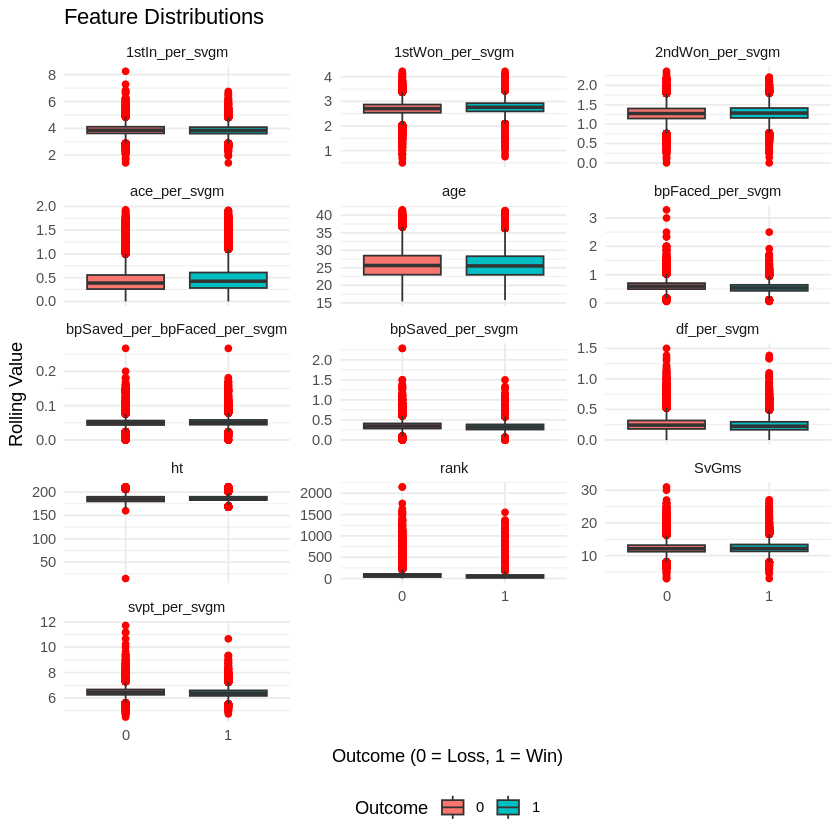

In [ ]:
# boxplot with outliers
ggplot(player_long, aes(x = factor(outcome), y = value, fill = factor(outcome))) +
  geom_boxplot(outlier.color = "red") +
  facet_wrap(~ metric, scales = "free_y", ncol = 3) +
  labs(x = "Outcome (0 = Loss, 1 = Win)",
       y = "Rolling Value",
       fill = "Outcome",
       title = "Feature Distributions") +
  theme_minimal() +
  theme(legend.position = "bottom")

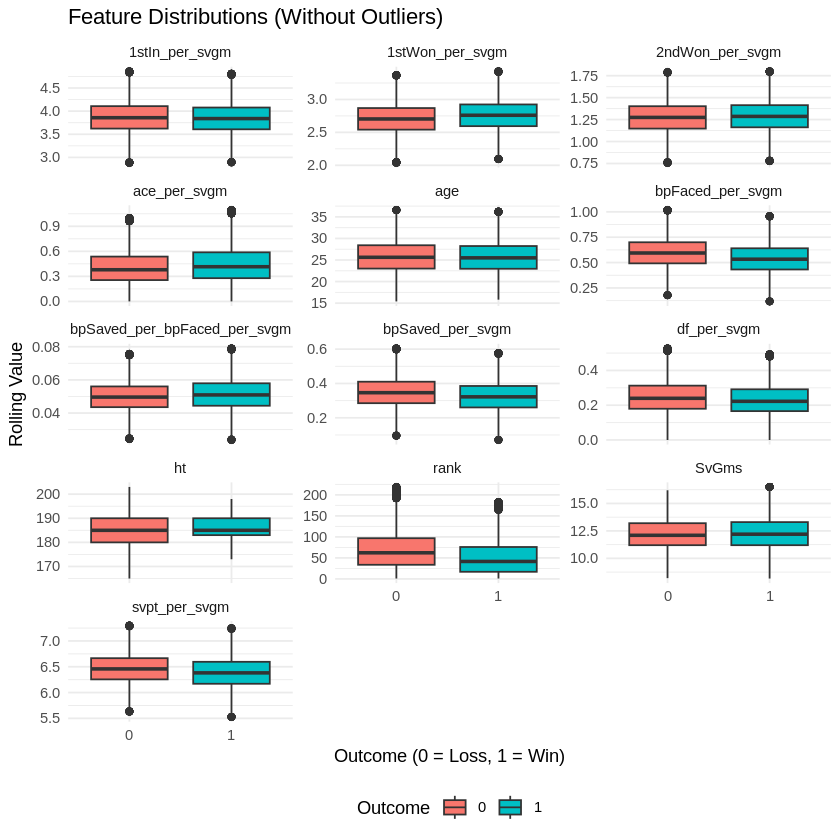

In [ ]:
# remove outliers using the 1.5*IQR rule, grouping by metric and outcome
player_long_no_outliers <- player_long %>%
  group_by(metric, outcome) %>%
  mutate(
    Q1 = quantile(value, 0.25, na.rm = TRUE),
    Q3 = quantile(value, 0.75, na.rm = TRUE),
    IQR = Q3 - Q1,
    lower_bound = Q1 - 1.5 * IQR,
    upper_bound = Q3 + 1.5 * IQR
  ) %>%
  filter(value >= lower_bound & value <= upper_bound) %>%
  ungroup()

# plot the boxplots without outliers
ggplot(player_long_no_outliers, aes(x = factor(outcome), y = value, fill = factor(outcome))) +
  geom_boxplot() +
  facet_wrap(~ metric, scales = "free_y", ncol = 3) +
  labs(x = "Outcome (0 = Loss, 1 = Win)",
       y = "Rolling Value",
       fill = "Outcome",
       title = "Feature Distributions (Without Outliers)") +
  theme_minimal() +
  theme(legend.position = "bottom")

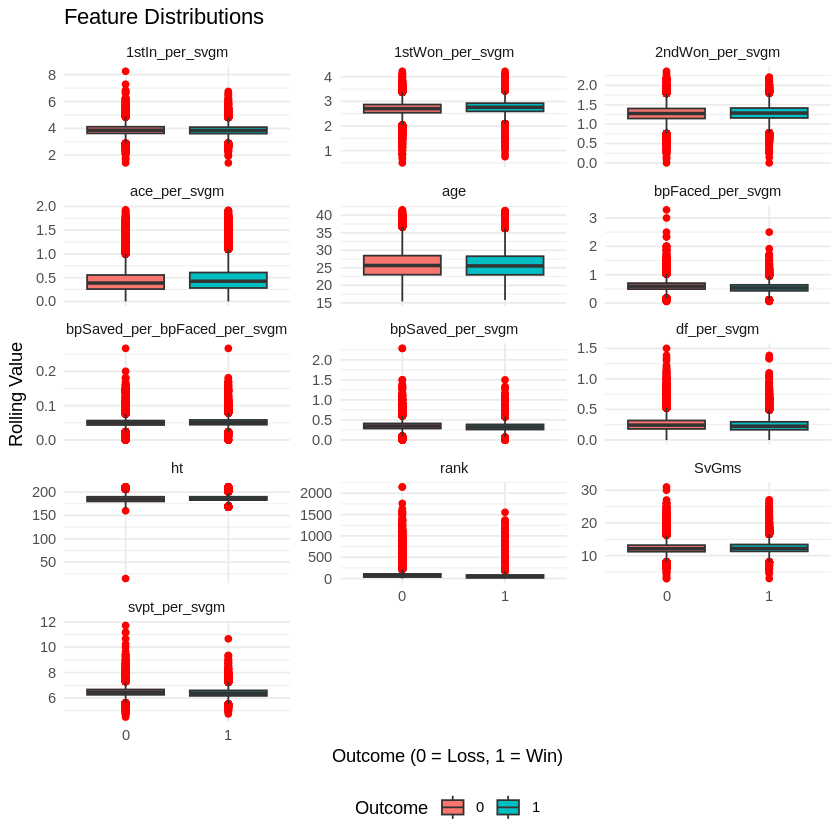

In [ ]:
# create boxplots to examine distributions
ggplot(player_long, aes(x = factor(outcome), y = value, fill = factor(outcome))) +
  geom_boxplot(outlier.color = "red") +
  facet_wrap(~ metric, scales = "free_y", ncol = 3) +
  labs(x = "Outcome (0 = Loss, 1 = Win)",
       y = "Rolling Value",
       fill = "Outcome",
       title = "Feature Distributions") +
  theme_minimal() +
  theme(legend.position = "bottom")

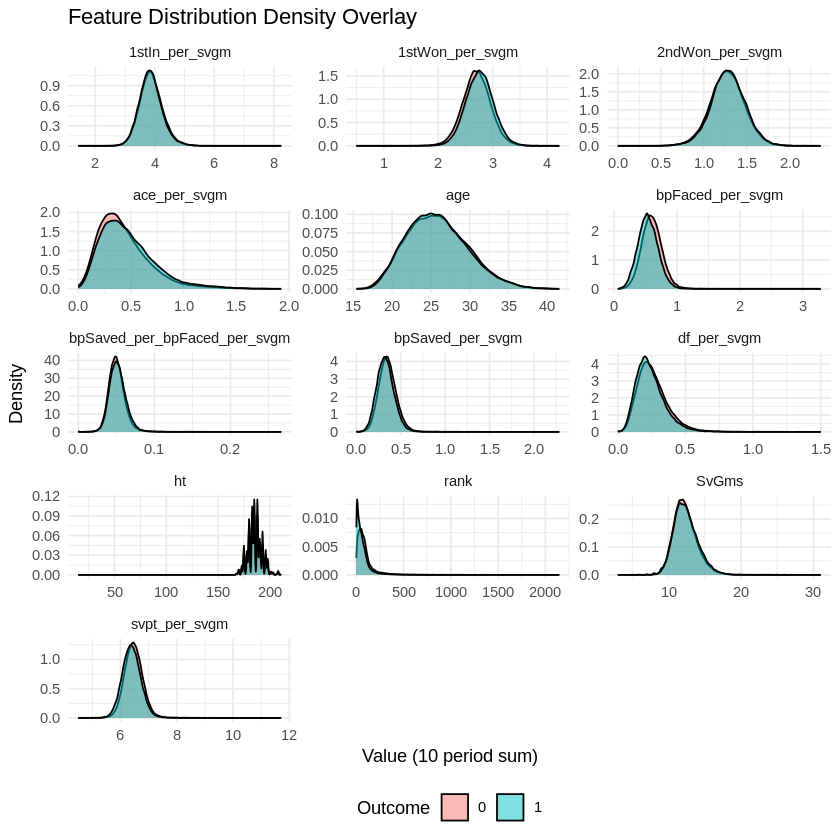

In [ ]:
# then create density plots
ggplot(player_long, aes(x = value, fill = factor(outcome))) +
  geom_density(alpha = 0.5) +
  facet_wrap(~ metric, scales = "free", ncol = 3) +
  labs(x = "Value (10 period sum)",
       y = "Density",
       fill = "Outcome",
       title = "Feature Distribution Density Overlay") +
  theme_minimal() +
  theme(legend.position = "bottom")

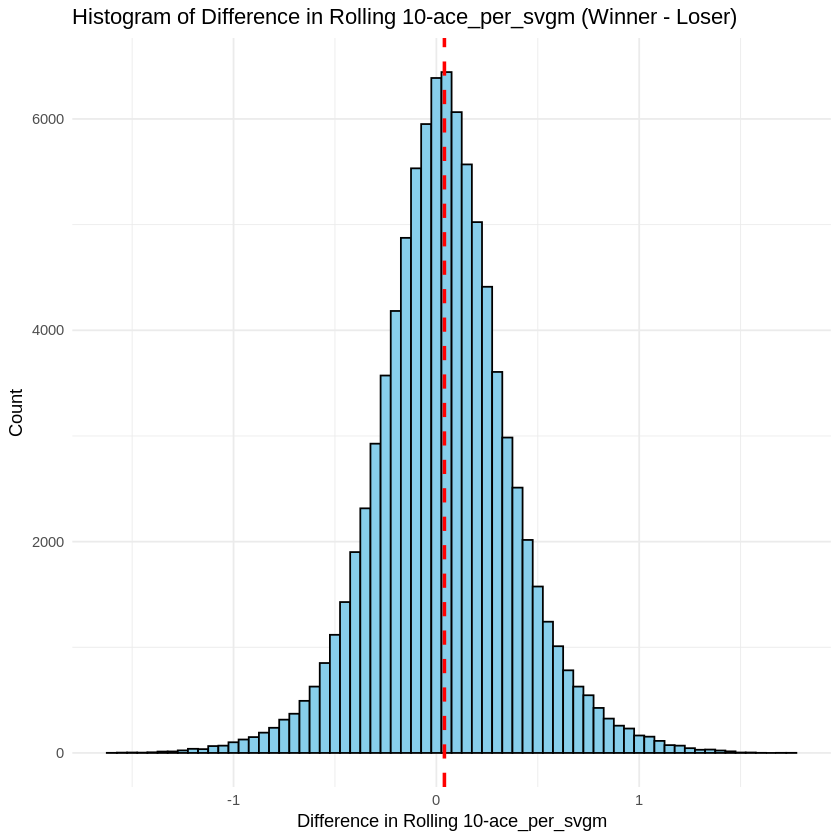

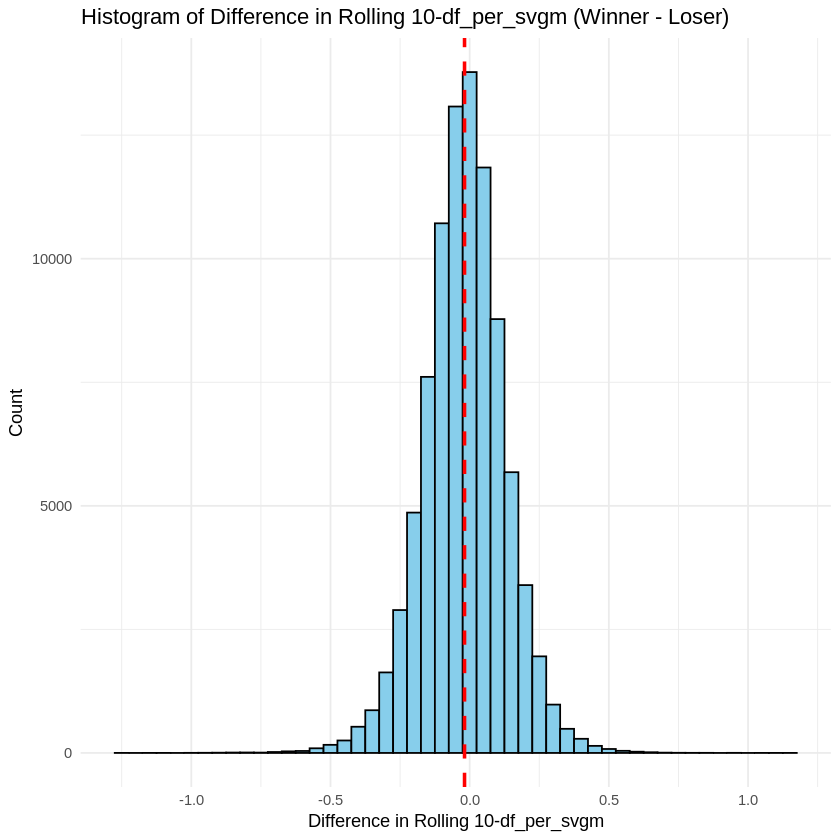

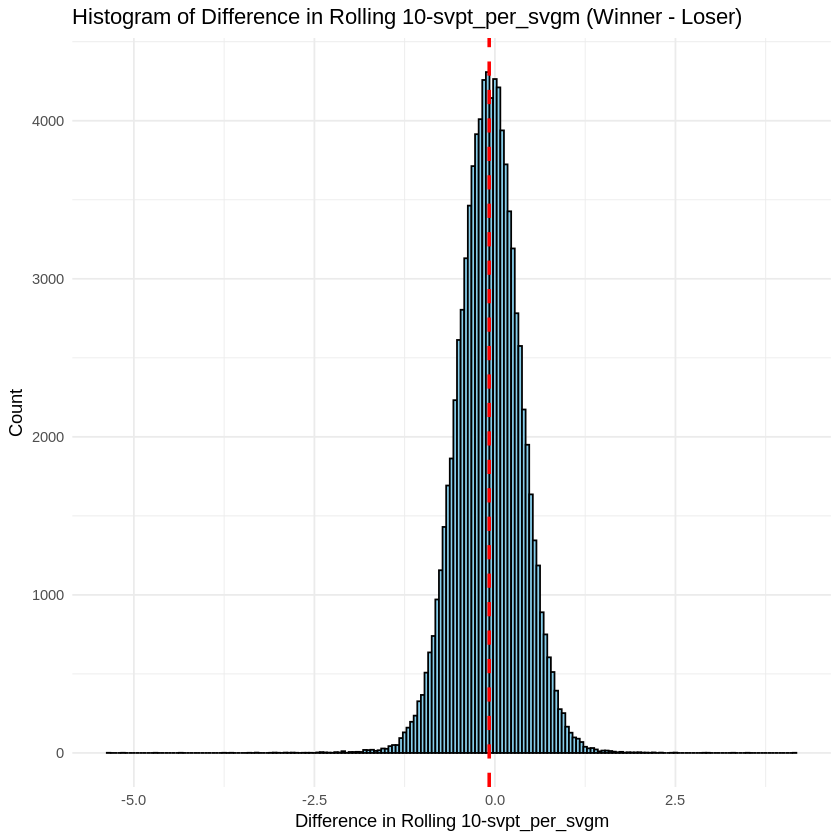

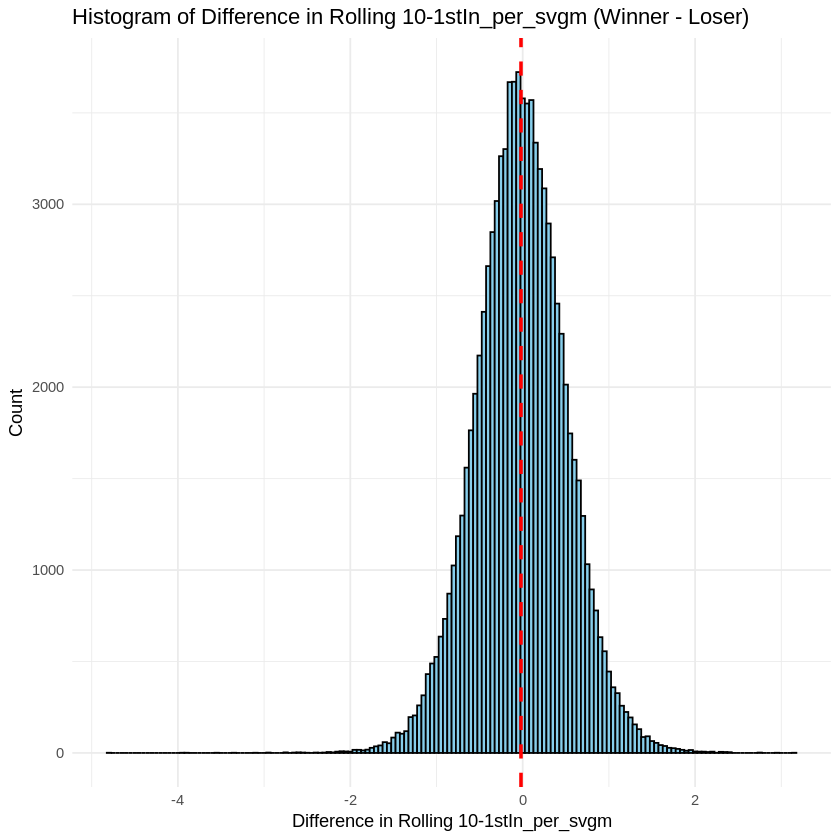

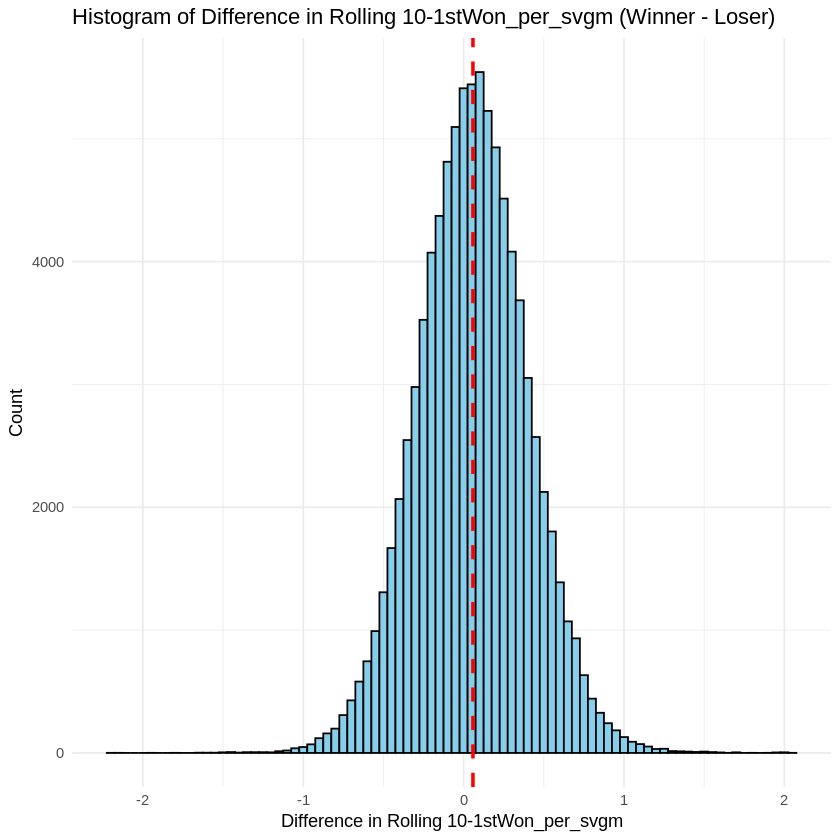

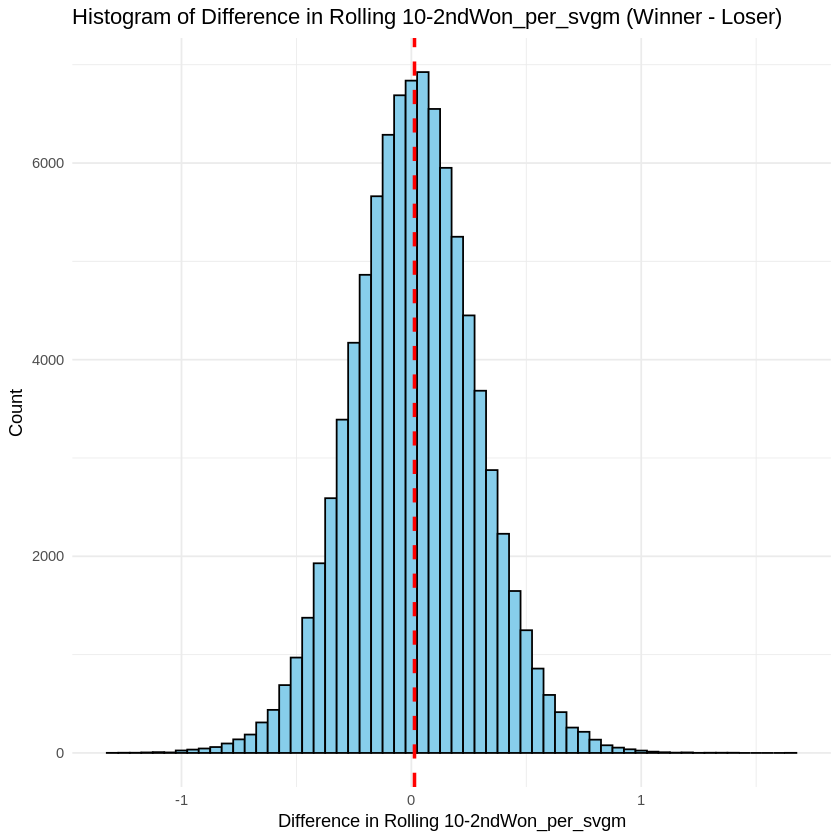

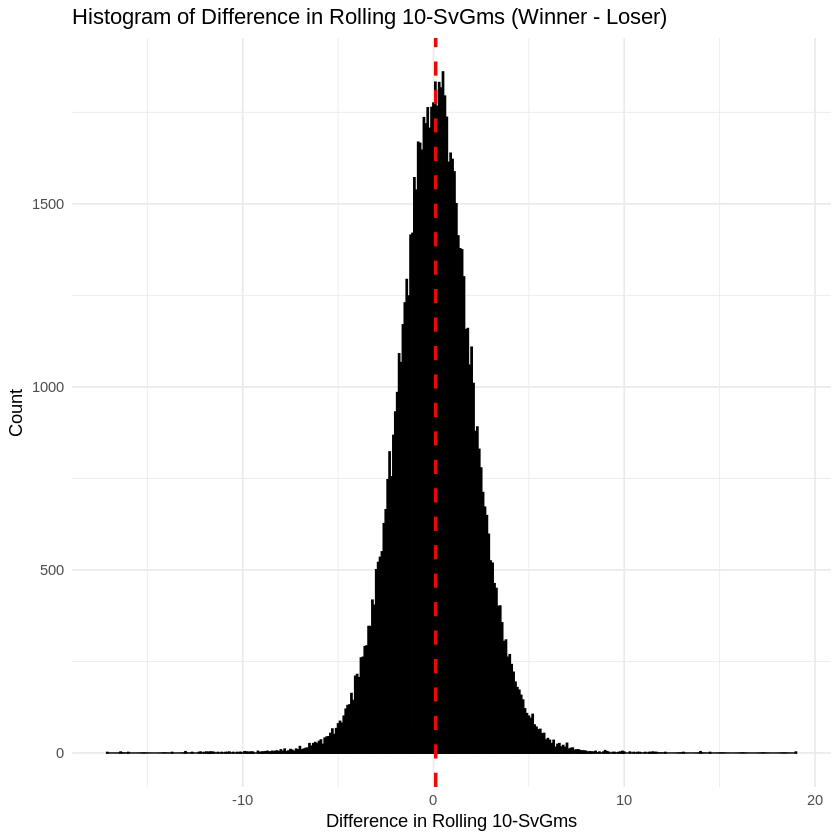

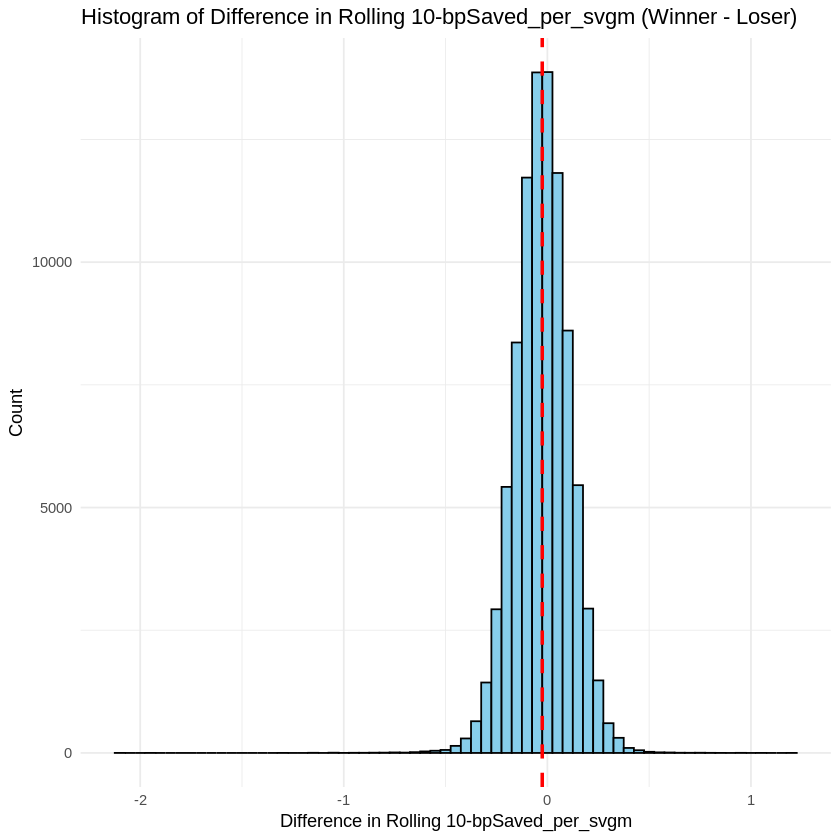

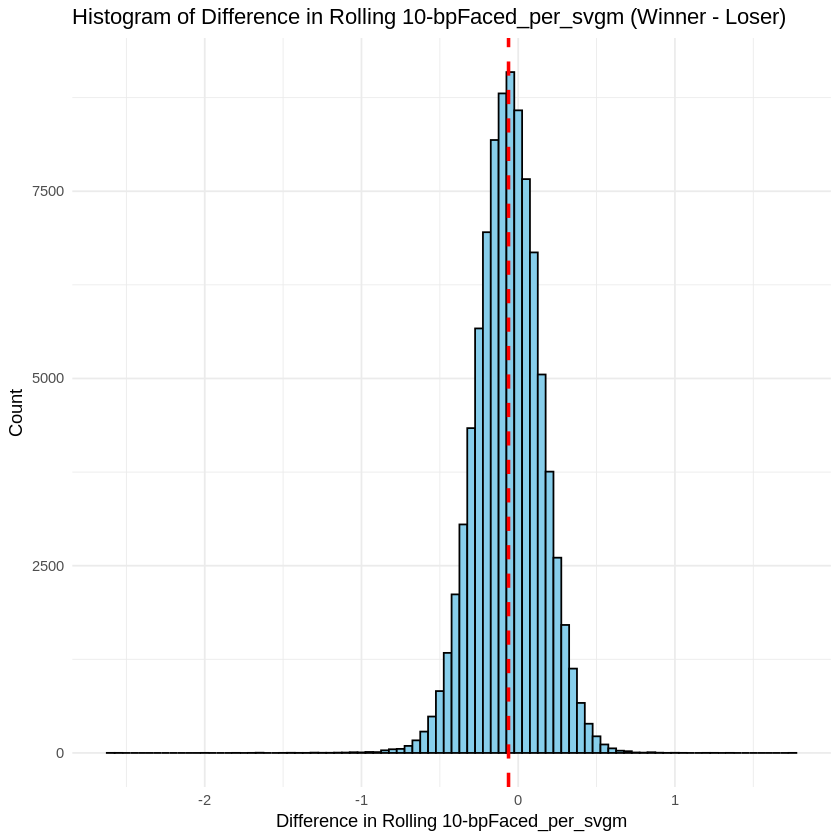

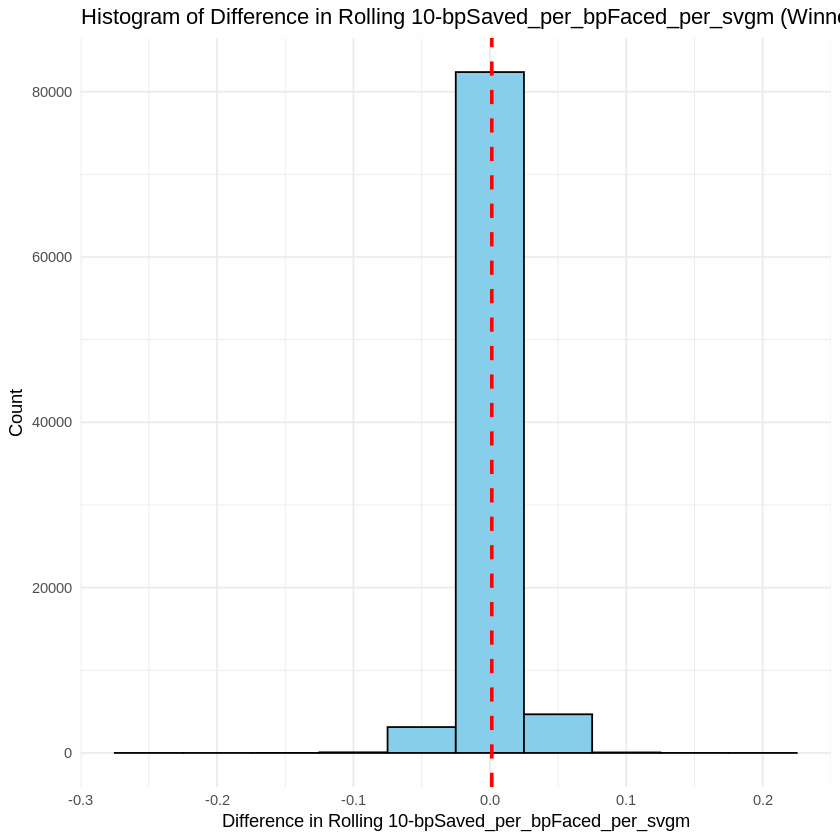

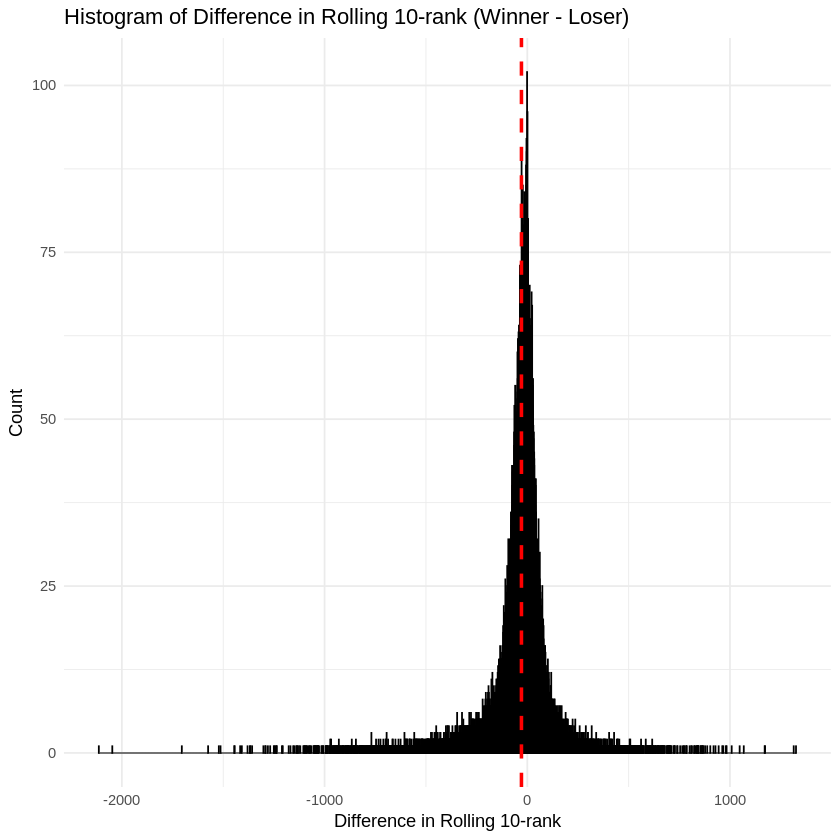

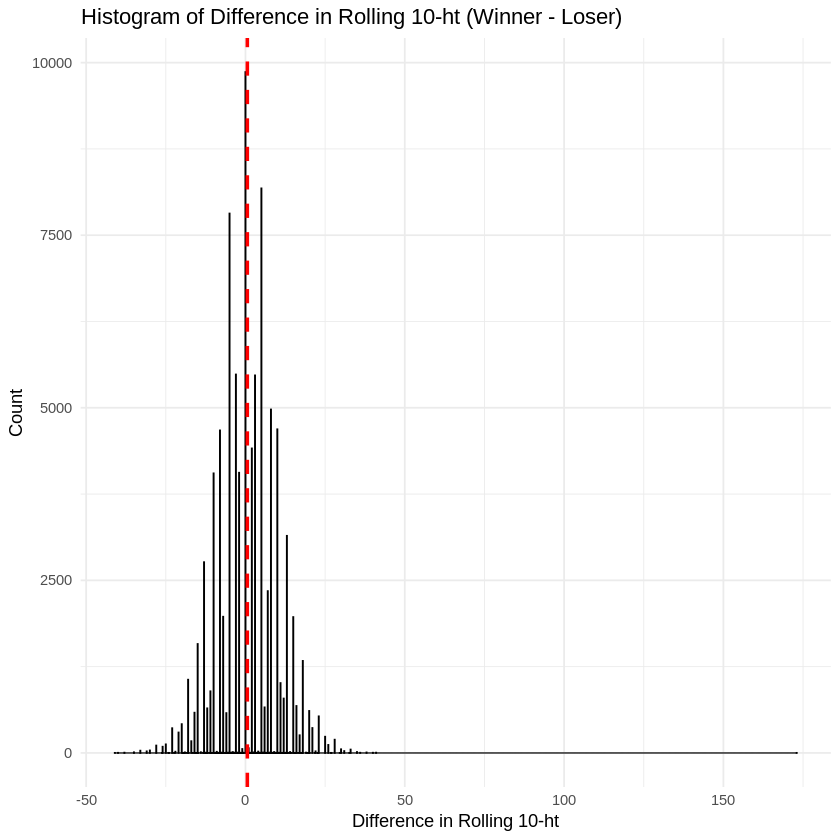

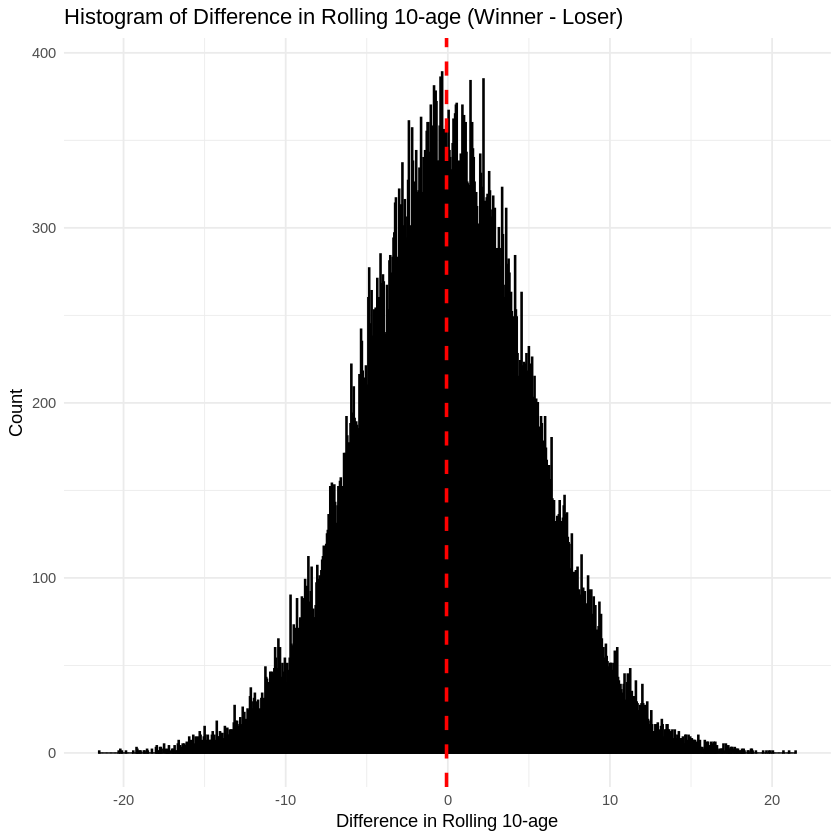

In [ ]:
# do the same for several other features
selected_features <- c("ace_per_svgm", "df_per_svgm", "svpt_per_svgm", "1stIn_per_svgm",
"1stWon_per_svgm", "2ndWon_per_svgm", "SvGms", "bpSaved_per_svgm", "bpFaced_per_svgm",
"bpSaved_per_bpFaced_per_svgm", "rank", "ht", "age")

# loop to plot
for(feat in selected_features) {
  diff_var <- paste0("diff_", feat)
  data[[diff_var]] <- data[[paste0("w_rolling_10_", feat)]] - data[[paste0("l_rolling_10_", feat)]]

  mean_val <- mean(data[[diff_var]], na.rm = TRUE)

  p <- ggplot(data, aes_string(x = diff_var)) +
    geom_histogram(binwidth = .05, fill = "skyblue", color = "black") +
    geom_vline(xintercept = mean_val, color = "red", linetype = "dashed", size = 1) +
    labs(title = paste("Histogram of Difference in Rolling 10-", feat, " (Winner - Loser)", sep=""),
         x = paste("Difference in Rolling 10-", feat, sep=""),
         y = "Count") +
    theme_minimal()

  print(p)
}

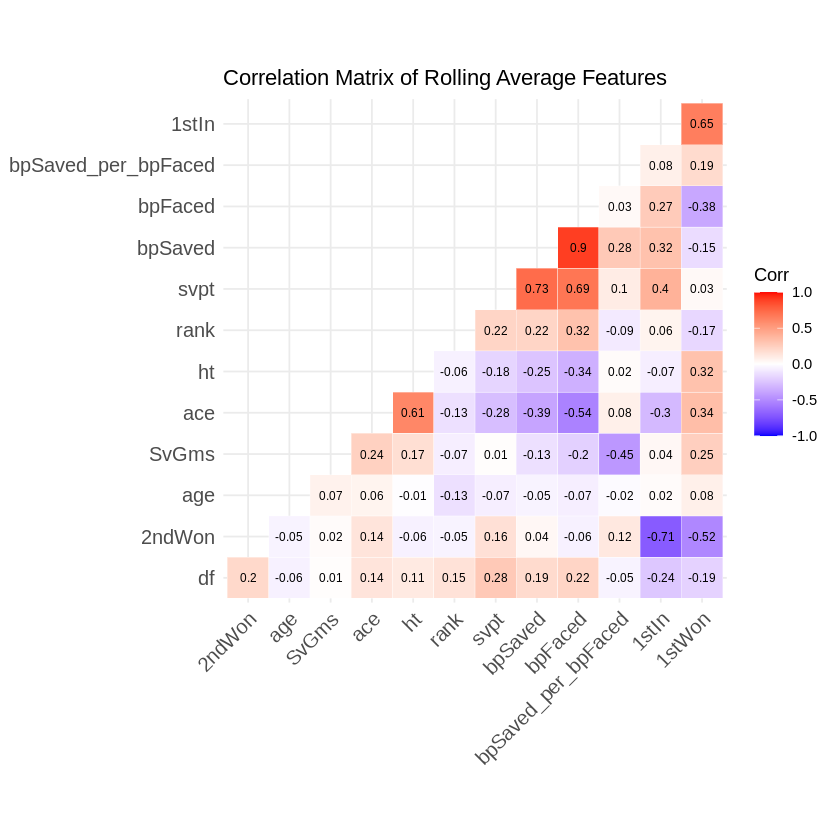

In [ ]:
# correlations
rolling_features <- data %>%
  select(starts_with("w_rolling_10_")) %>%
  rename_with(~ gsub("w_rolling_10_", "", .x)) %>%
  rename_with(~ gsub("_per_svgm", "", .x))

# get corr matrix
cor_matrix <- cor(rolling_features, use = "complete.obs")

# plot
ggcorrplot(
  cor_matrix,
  lab = TRUE,
  lab_size = 2.5,
  method = "square",
  type = "lower",
  hc.order = TRUE,
  outline.color = "white",
  title = "Correlation Matrix of Rolling Average Features"
) +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
  )

In [ ]:
# flatten corrs and remove self-correlations and duplicates
cor_df <- as.data.frame(as.table(cor_matrix)) %>%
  rename(Var1 = Var1, Var2 = Var2, Correlation = Freq)

cor_df <- cor_df %>%
  filter(Var1 != Var2) %>%
  rowwise() %>%
  mutate(
    pair = paste(sort(c(Var1, Var2)), collapse = " - ")
  ) %>%
  ungroup() %>%
  group_by(pair) %>%
  slice(1) %>%
  ungroup()

# take top 10 by abs(corr)
top_10_corr <- cor_df %>%
  arrange(desc(abs(Correlation))) %>%
  slice(1:10)

top_10_corr

Var1,Var2,Correlation,pair
<fct>,<fct>,<dbl>,<chr>
bpFaced,bpSaved,0.9044311,bpSaved - bpFaced
bpSaved,svpt,0.7328692,svpt - bpSaved
2ndWon,1stIn,-0.7092601,1stIn - 2ndWon
bpFaced,svpt,0.6879318,svpt - bpFaced
1stWon,1stIn,0.6541583,1stIn - 1stWon
ht,ace,0.6099673,ace - ht
bpFaced,ace,-0.5399158,ace - bpFaced
2ndWon,1stWon,-0.5237848,1stWon - 2ndWon
bpSaved_per_bpFaced,SvGms,-0.4526239,SvGms - bpSaved_per_bpFaced


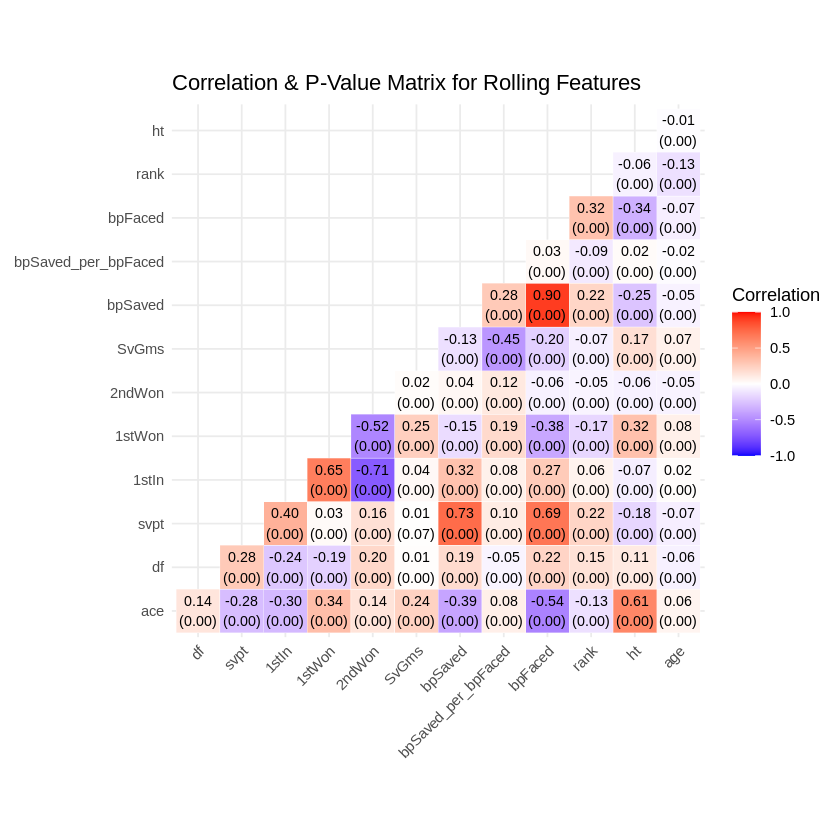

In [ ]:

# get corrs and corresponding p-values
cor_res <- rcorr(as.matrix(rolling_features))
cor_matrix <- cor_res$r
p_matrix   <- cor_res$P

# flatten correlation matrix
cor_long <- as.data.frame(as.table(cor_matrix)) %>%
  rename(Var1 = Var1, Var2 = Var2, correlation = Freq)

# flatten p-values
p_long <- as.data.frame(as.table(p_matrix)) %>%
  rename(Var1 = Var1, Var2 = Var2, p_value = Freq)

# merge correlation and p-value info
df_merged <- cor_long %>%
  left_join(p_long, by = c("Var1", "Var2"))

# remove dupliactes
df_merged <- df_merged %>%
  filter(Var1 != Var2) %>%
  rowwise() %>%
  mutate(pair = paste0(sort(c(as.character(Var1), as.character(Var2))), collapse = "-")) %>%
  ungroup() %>%
  group_by(pair) %>%
  slice(1) %>%
  ungroup()

# plot
ggplot(df_merged, aes(x = Var1, y = Var2, fill = correlation)) +
  geom_tile(color = "white") +
  geom_text(aes(label = sprintf("%.2f\n(%.2f)", correlation, p_value)), size = 3) +
  scale_fill_gradient2(
    low = "blue", mid = "white", high = "red",
    midpoint = 0, limit = c(-1, 1), name = "Correlation"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)
  ) +
  labs(
    title = "Correlation & P-Value Matrix for Rolling Features",
    x = NULL, y = NULL
  ) +
  coord_fixed()


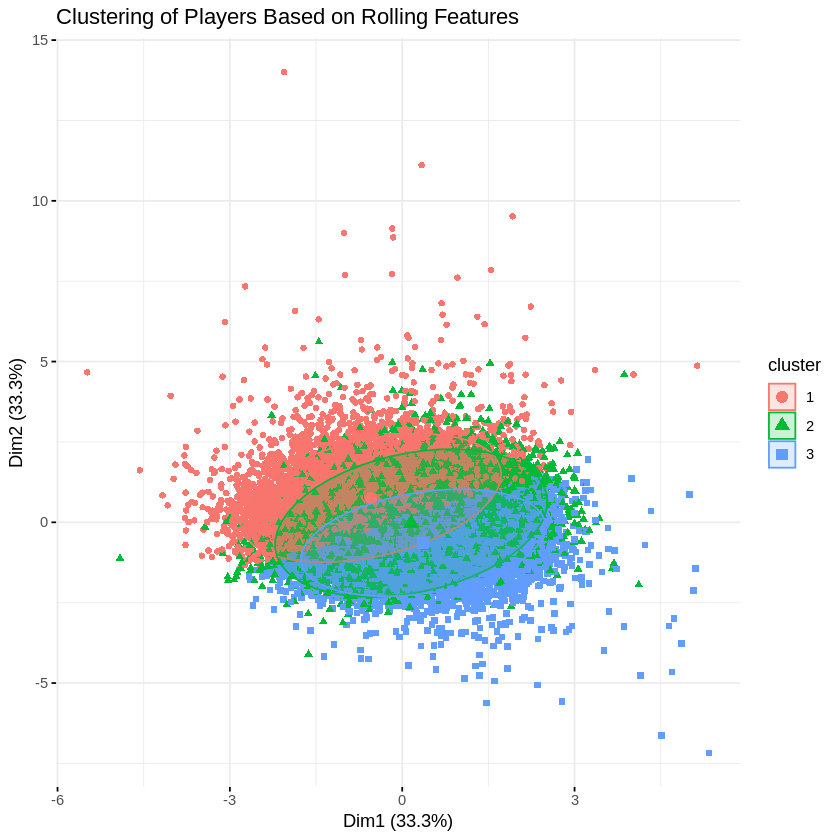

In [ ]:
# examine select features
feature_subset <- data %>%
  select(w_rolling_10_ace_per_svgm, w_rolling_10_svpt_per_svgm, w_rolling_10_1stWon_per_svgm) %>%
  na.omit()  # ensure no NAs

# Cluster using kmeans
feature_scaled <- scale(feature_subset)
set.seed(106)
km <- kmeans(feature_scaled, centers = 3)

# PCA and plot
pca_res <- prcomp(feature_scaled)
fviz_cluster(list(data = pca_res$x, cluster = km$cluster),
             geom = "point",
             ellipse.type = "norm",
             ggtheme = theme_minimal(),
             main = "Clustering of Players Based on Rolling Features")


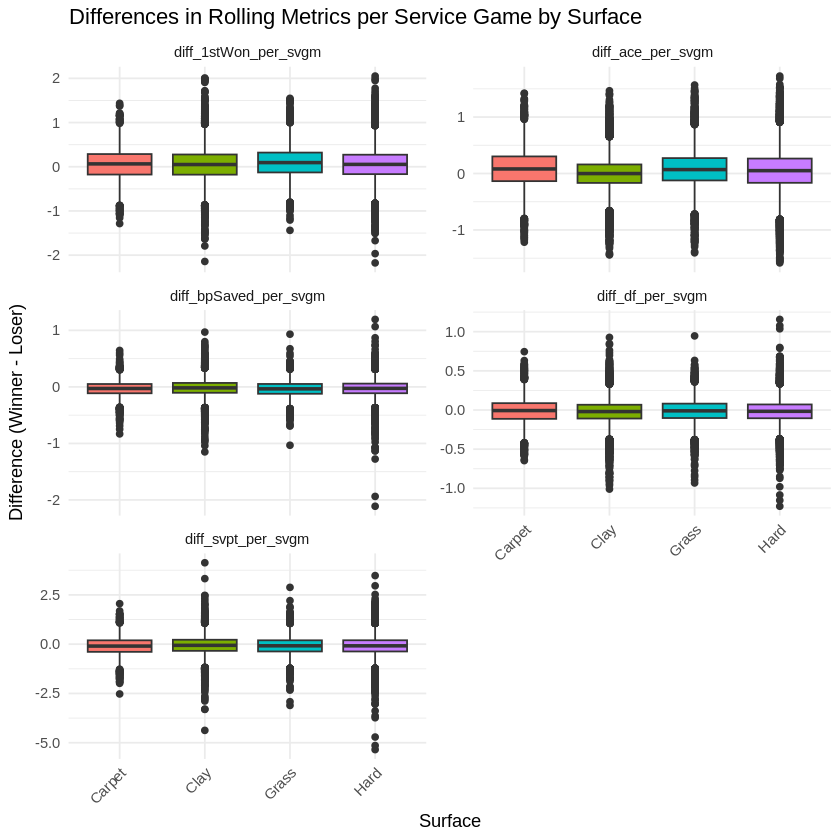

In [ ]:
# calc differences between winner and loser rolling avgs
new_data <- data %>%
  mutate(diff_ace_per_svgm = w_rolling_10_ace_per_svgm - l_rolling_10_ace_per_svgm,
         diff_df_per_svgm = w_rolling_10_df_per_svgm - l_rolling_10_df_per_svgm,
         diff_svpt_per_svgm = w_rolling_10_svpt_per_svgm - l_rolling_10_svpt_per_svgm,
         diff_1stWon_per_svgm = w_rolling_10_1stWon_per_svgm - l_rolling_10_1stWon_per_svgm,
         diff_bpSaved_per_svgm = w_rolling_10_bpSaved_per_svgm - l_rolling_10_bpSaved_per_svgm)

# get long format
new_data_long <- new_data %>%
  pivot_longer(cols = c(diff_ace_per_svgm, diff_df_per_svgm, diff_svpt_per_svgm, diff_1stWon_per_svgm, diff_bpSaved_per_svgm),
               names_to = "metric",
               values_to = "difference")

# boxplot
ggplot(new_data_long, aes(x = surface, y = difference, fill = surface)) +
  geom_boxplot() +
  facet_wrap(~ metric, scales = "free_y", ncol = 2) +
  labs(title = "Differences in Rolling Metrics per Service Game by Surface",
       x = "Surface",
       y = "Difference (Winner - Loser)") +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1))

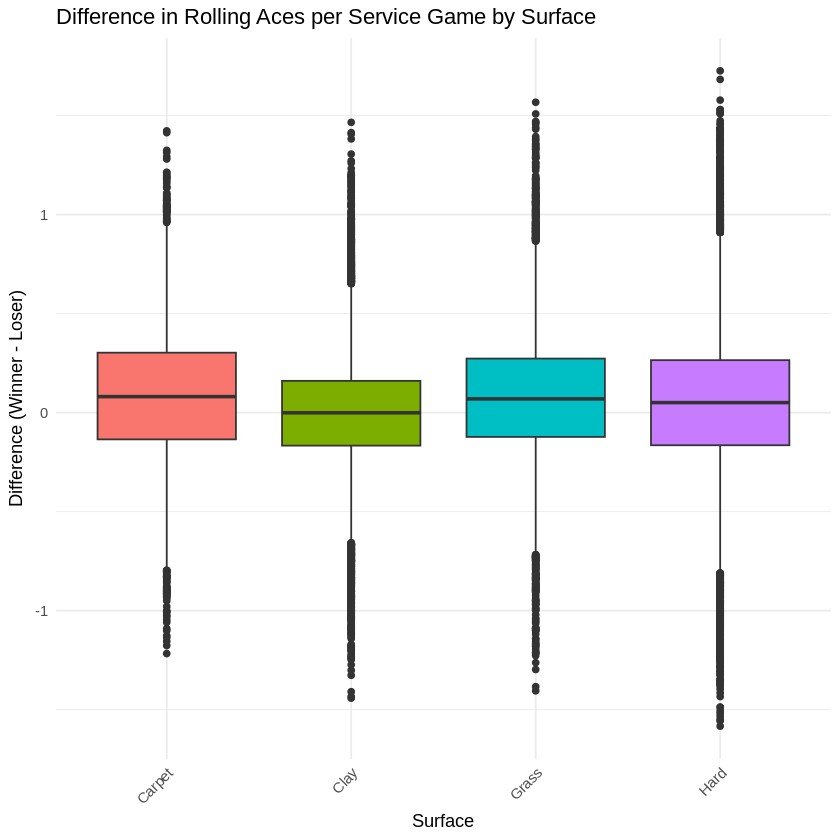

In [ ]:
# subset for just aces
new_data_long_subset <- new_data_long %>%
  filter(metric == "diff_ace_per_svgm")

ggplot(new_data_long_subset, aes(x = surface, y = difference, fill = surface)) +
  geom_boxplot() +
  labs(title = "Difference in Rolling Aces per Service Game by Surface",
       x = "Surface",
       y = "Difference (Winner - Loser)") +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1))


# Base Model

In [ ]:
library(tidyverse)
install.packages("PlayerRatings")
library(PlayerRatings)

matches <- read.csv("atp_matches_with_features.csv")
matches$tourney_date <- as.Date(matches$tourney_date)
matches <- matches[order(matches$tourney_date), ]

# identify all winner rolling columns
w_rolling_cols <- grep("^w_rolling_10_", colnames(matches), value = TRUE)

# create difference columns dynamically
for (col in w_rolling_cols) {
  base_stat <- sub("^w_rolling_10_", "", col)
  l_col <- paste0("l_rolling_10_", base_stat)

  if (l_col %in% colnames(matches)) {
    diff_col <- paste0("diff_rolling_10_", base_stat)
    matches[[diff_col]] <- matches[[col]] - matches[[l_col]]
  }
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
✔ purrr     1.0.4     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%@%()         masks rlang::%@%()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks rlang::flatten()
✖ purrr::flatten_chr() masks rlang::flatten_chr()
✖ purrr::flatten_dbl() masks rlang::flatten_dbl()
✖ purrr::flatten_int() masks rlang::flatten_int()
✖ purrr::flatten_lgl() masks rlang::flatten_lgl()
✖ purrr::flatten_raw() masks rlang::flatten_raw()
✖ purrr::invoke()      masks rlang::invoke()
✖ dplyr::lag()         masks stats::lag()
✖ purrr::splice()      masks rlang::splice()
✖ dplyr::src()         masks Hmisc::src()
✖ dplyr::summarize()   masks Hmisc::summarize()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing 

Training set matches: 65462 
Testing set matches: 24861 
                  Player   Rating Games Win Draw Loss Lag
1         Novak Djokovic 2202.328   694 564    0  130   0
2          Roger Federer 2094.094  1137 927    0  210   0
3           Rafael Nadal 2087.811   803 667    0  136   2
4            Andy Murray 1988.600   598 451    0  147   0
5  Juan Martin del Potro 1949.483   415 294    0  121  31
6        Robin Soderling 1947.508   444 283    0  161 136
7          Kei Nishikori 1946.100   274 173    0  101   0
8            Marin Cilic 1869.787   441 284    0  157   0
9          Tomas Berdych 1867.601   673 431    0  242   0
10       Grigor Dimitrov 1864.092   216 125    0   91   1


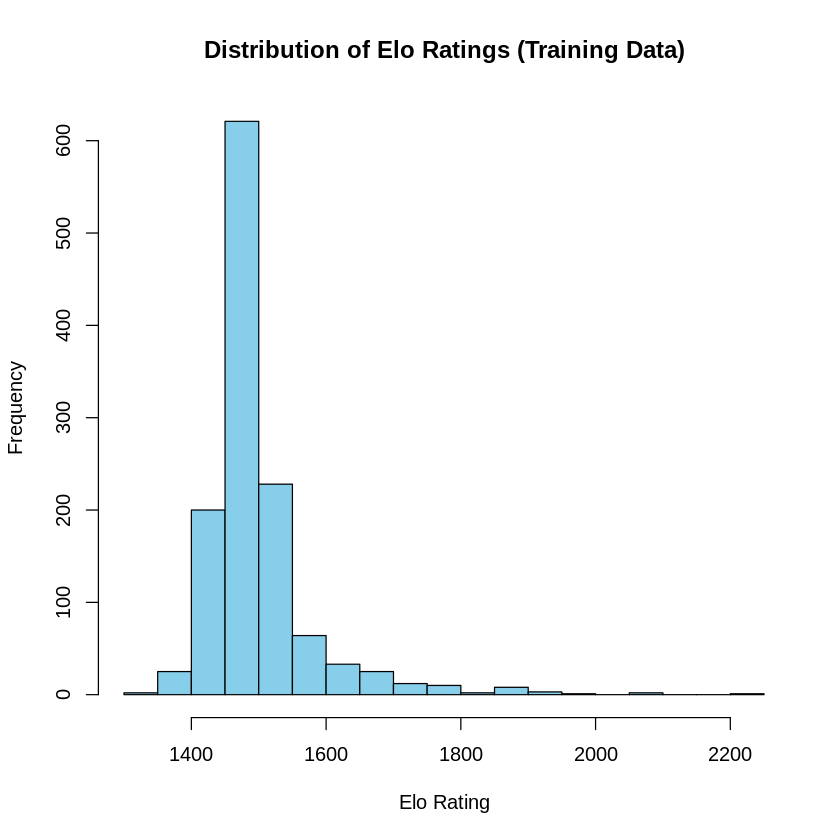

In [ ]:
# TRAIN

# train test split
matches$season <- as.numeric(format(matches$tourney_date, "%Y"))
cutoff_season <- 2014
train_matches <- matches %>% filter(season <= cutoff_season)
test_matches  <- matches %>% filter(season > cutoff_season)
cat("Training set matches:", nrow(train_matches), "\n")
cat("Testing set matches:", nrow(test_matches), "\n")

# elo
train_games <- data.frame(
  Date  = as.numeric(format(train_matches$tourney_date, "%Y%m%d")),
  Team1 = train_matches$winner_name,
  Team2 = train_matches$loser_name,
  Score = 1,
  stringsAsFactors = FALSE
)
elo_model_train <- elo(train_games, init = 1500, kfac = 20, gamma = 0)

# top 10 players
elo_ratings_train <- elo_model_train$ratings
elo_ratings_train <- elo_ratings_train[order(elo_ratings_train$Rating, decreasing = TRUE), ]
top10_elo_train <- head(elo_ratings_train, 10)
print(top10_elo_train)

# plot distribution of Elo ratings based on training data
hist(elo_ratings_train$Rating,
     main = "Distribution of Elo Ratings (Training Data)",
     xlab = "Elo Rating",
     col = "skyblue",
     breaks = 30)

In [ ]:
# TEST
k_factor <- 20

# helper function for elo
calculate_win_prob <- function(rating_diff) {
  1 / (1 + 10^(-rating_diff/400))
}

current_ratings <- setNames(elo_ratings_train$Rating, elo_ratings_train$Player)

# new column to store the predicted win probability (elo_prob) for the actual winner
test_matches$elo_prob <- NA

# simulate
for (i in 1:nrow(test_matches)) {
  winner <- test_matches$winner_name[i]
  loser  <- test_matches$loser_name[i]

  # retrieve current ratings; if not available (new player), default to 1500
  winner_rating <- ifelse(winner %in% names(current_ratings), current_ratings[[winner]], 1500)
  loser_rating  <- ifelse(loser  %in% names(current_ratings), current_ratings[[loser]], 1500)

  # predicted win probability for the winner based on the rating difference
  p_win <- calculate_win_prob(winner_rating - loser_rating)
  test_matches$elo_prob[i] <- p_win

  # Update ratings for both players
  current_ratings[[winner]] <- winner_rating + k_factor * (1 - p_win)
  current_ratings[[loser]]  <- loser_rating + k_factor * (0 - (1 - p_win))
}

# evaluation metrics
test_matches$correct_prediction <- test_matches$elo_prob > 0.5
accuracy <- mean(test_matches$correct_prediction, na.rm = TRUE)
misclassification_rate <- 1 - accuracy
cat("Misclassification Rate:", misclassification_rate, "\n")

test_matches$brier_score <- (1 - test_matches$elo_prob)^2
mean_brier_score <- mean(test_matches$brier_score, na.rm = TRUE)
cat("Mean Brier Score:", mean_brier_score, "\n")

Misclassification Rate: 0.3527614 
Mean Brier Score: 0.2158923 


# MS3 Model

Feature engineering (nonlinear/polynomial/derived features)

In [ ]:
# Examine data
str(matches)

'data.frame':	90323 obs. of  91 variables:
 $ tourney_id                                  : chr  "1991-354" "1991-339" "1991-339" "1991-339" ...
 $ tourney_name                                : chr  "Wellington" "Adelaide" "Adelaide" "Adelaide" ...
 $ surface                                     : chr  "Hard" "Hard" "Hard" "Hard" ...
 $ draw_size                                   : num  32 32 32 32 32 32 32 32 32 32 ...
 $ tourney_level                               : chr  "A" "A" "A" "A" ...
 $ tourney_date                                : Date, format: "1990-12-31" "1990-12-31" ...
 $ match_num                                   : int  20 30 29 28 27 26 25 24 23 22 ...
 $ winner_id                                   : int  100752 101529 101900 101793 101529 101900 101723 101793 101441 101061 ...
 $ winner_seed                                 : num  NA 6 NA 2 6 NA NA 2 NA NA ...
 $ winner_entry                                : chr  "" "" "" "" ...
 $ winner_name                          

In [ ]:
cols_to_drop = c("tourney_id","tourney_name","draw_size","winner_id","winner_entry","winner_ioc","loser_id","loser_entry","loser_ioc","winner_rank_points","loser_rank_points")
ms3_matches = matches[ , !(names(matches) %in% cols_to_drop)]
str(ms3_matches)

'data.frame':	90323 obs. of  80 variables:
 $ surface                                     : chr  "Hard" "Hard" "Hard" "Hard" ...
 $ tourney_level                               : chr  "A" "A" "A" "A" ...
 $ tourney_date                                : Date, format: "1990-12-31" "1990-12-31" ...
 $ match_num                                   : int  20 30 29 28 27 26 25 24 23 22 ...
 $ winner_seed                                 : num  NA 6 NA 2 6 NA NA 2 NA NA ...
 $ winner_name                                 : chr  "Ramesh Krishnan" "Michael Stich" "Nicklas Kulti" "Jim Courier" ...
 $ winner_hand                                 : chr  "R" "R" "R" "R" ...
 $ loser_seed                                  : num  5 2 NA NA NA NA NA NA NA NA ...
 $ loser_name                                  : chr  "Luiz Mattar" "Jim Courier" "Magnus Larsson" "Martin Sinner" ...
 $ loser_hand                                  : chr  "R" "R" "R" "R" ...
 $ score                                       : chr  "6-

Clean match level data features so there is no leakage

In [ ]:
# Function to create a clean dataset for modeling without match result leakage
prepare_clean_data <- function(matches) {

  # Select only pre-match features and contextual information
  clean_data <- matches %>% select(
    # Match identifiers (for reference)
    tourney_id, tourney_date, winner_id, winner_name, loser_id, loser_name,

    # Match context (not leaking outcome)
    surface, tourney_level, season,

    # Standard player attributes (non-rolling)
    w_ht, l_ht, w_age, l_age, w_rank, l_rank,

    # Pre-match player statistics (rolling averages)
    starts_with("w_rolling_10_"),
    starts_with("l_rolling_10_"),
    starts_with("diff_rolling_10_")
  )

  # Remove rolling height and age columns (but keep rolling rank)
  rolling_to_remove <- c("w_rolling_10_ht", "l_rolling_10_ht",
                        "w_rolling_10_age", "l_rolling_10_age",
                        "diff_rolling_10_ht", "diff_rolling_10_age")

  # Remove any columns that might contain post-match information
  leak_patterns <- c("minutes", "score", "winner_name", "loser_name", "tourney_id", "w_ace$", "w_df$", "w_svpt$",
                    "w_1stIn$", "w_1stWon$", "w_2ndWon$", "w_SvGms$",
                    "w_bpSaved$", "w_bpFaced$", "l_ace$", "l_df$",
                    "l_svpt$", "l_1stIn$", "l_1stWon$", "l_2ndWon$",
                    "l_SvGms$", "l_bpSaved$", "l_bpFaced$")

  # Create regex pattern for columns to remove
  remove_pattern <- paste(leak_patterns, collapse="|")
  cols_to_remove <- grep(remove_pattern, colnames(clean_data), value=TRUE)

  # Combine all columns to remove
  all_cols_to_remove <- c(cols_to_remove, rolling_to_remove)

  # Remove leaking columns and unwanted rolling stats if they exist
  if(length(all_cols_to_remove) > 0) {
    clean_data <- clean_data %>% select(-all_of(all_cols_to_remove))
  }

  # Convert categorical variables to factors
  clean_data$surface <- as.factor(clean_data$surface)
  clean_data$tourney_level <- as.factor(clean_data$tourney_level)

  return(clean_data)
}

# Apply the function to create clean data
clean_matches <- prepare_clean_data(matches)

# Create train and test splits
train_data <- clean_matches %>% filter(season <= 2014)
test_data <- clean_matches %>% filter(season > 2014)

# Print the dimensions of the datasets
cat("Clean dataset dimensions:", dim(clean_matches), "\n")
cat("Training set dimensions:", dim(train_data), "\n")
cat("Testing set dimensions:", dim(test_data), "\n")

# Check column names to confirm no match outcome data is included
str(clean_matches)

Clean dataset dimensions: 90323 45 
Training set dimensions: 65462 45 
Testing set dimensions: 24861 45 
'data.frame':	90323 obs. of  45 variables:
 $ tourney_date                                : Date, format: "1990-12-31" "1990-12-31" ...
 $ winner_id                                   : int  100752 101529 101900 101793 101529 101900 101723 101793 101441 101061 ...
 $ loser_id                                    : int  100954 101793 101723 101441 101061 102148 101234 101235 101185 101727 ...
 $ surface                                     : Factor w/ 4 levels "Carpet","Clay",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ tourney_level                               : Factor w/ 6 levels "A","D","F","G",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season                                      : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ w_ht                                        : num  170 193 190 185 193 190 193 185 180 175 ...
 $ l_ht                                        : num  183 185 193 180 175

Shuffle winner and loser into player1 and player2 colomns

In [ ]:
# Improved function to create unbiased data with proper naming
create_unbiased_data_fixed <- function(matches) {
  # Set seed for reproducibility
  set.seed(123)

  # Initialize a new dataframe with key columns
  unbiased_data <- data.frame(
    tourney_date = matches$tourney_date,
    surface = matches$surface,
    tourney_level = matches$tourney_level,
    season = matches$season,
    stringsAsFactors = FALSE
  )

  # Randomly decide if winner is player1 or player2
  n <- nrow(matches)
  flip <- sample(c(TRUE, FALSE), n, replace = TRUE)

  # Assign player IDs and names
  unbiased_data$p1_id <- numeric(n)
  unbiased_data$p2_id <- numeric(n)

  # Fill based on flip
  unbiased_data$p1_id[flip] <- matches$winner_id[flip]
  unbiased_data$p2_id[flip] <- matches$loser_id[flip]

  unbiased_data$p1_id[!flip] <- matches$loser_id[!flip]
  unbiased_data$p2_id[!flip] <- matches$winner_id[!flip]

  # Set target variable
  unbiased_data$player1_won <- as.integer(flip)

  # Add non-rolling height and age
  unbiased_data$p1_ht <- numeric(n)
  unbiased_data$p2_ht <- numeric(n)
  unbiased_data$p1_age <- numeric(n)
  unbiased_data$p2_age <- numeric(n)
  unbiased_data$p1_rank <- numeric(n)
  unbiased_data$p2_rank <- numeric(n)

  # Assign values based on flip
  unbiased_data$p1_ht[flip] <- matches$w_ht[flip]
  unbiased_data$p2_ht[flip] <- matches$l_ht[flip]
  unbiased_data$p1_age[flip] <- matches$w_age[flip]
  unbiased_data$p2_age[flip] <- matches$l_age[flip]
  unbiased_data$p1_rank[flip] <- matches$w_rank[flip]
  unbiased_data$p2_rank[flip] <- matches$l_rank[flip]

  unbiased_data$p1_ht[!flip] <- matches$l_ht[!flip]
  unbiased_data$p2_ht[!flip] <- matches$w_ht[!flip]
  unbiased_data$p1_age[!flip] <- matches$l_age[!flip]
  unbiased_data$p2_age[!flip] <- matches$w_age[!flip]
  unbiased_data$p1_rank[!flip] <- matches$l_rank[!flip]
  unbiased_data$p2_rank[!flip] <- matches$w_rank[!flip]

  # Calculate differences for non-rolling attributes
  unbiased_data$diff_ht <- unbiased_data$p1_ht - unbiased_data$p2_ht
  unbiased_data$diff_age <- unbiased_data$p1_age - unbiased_data$p2_age
  unbiased_data$diff_rank <- unbiased_data$p1_rank - unbiased_data$p2_rank

  # Get all rolling feature columns
  w_cols <- grep("^w_rolling_10_", colnames(matches), value = TRUE)
  l_cols <- grep("^l_rolling_10_", colnames(matches), value = TRUE)

  # Create player1 and player2 features for all rolling features
  for (i in 1:length(w_cols)) {
    w_col <- w_cols[i]
    l_col <- l_cols[i]

    # Skip rolling height and age columns but keep rolling rank
    feat_name <- sub("^w_", "", w_col)  # Just remove w_ prefix
    if (feat_name %in% c("rolling_10_ht", "rolling_10_age")) {
      next  # Skip to next iteration
    }

    # Create p1 feature
    p1_col <- paste0("p1_", feat_name)
    unbiased_data[[p1_col]] <- numeric(n)
    unbiased_data[[p1_col]][flip] <- matches[[w_col]][flip]
    unbiased_data[[p1_col]][!flip] <- matches[[l_col]][!flip]

    # Create p2 feature
    p2_col <- paste0("p2_", feat_name)
    unbiased_data[[p2_col]] <- numeric(n)
    unbiased_data[[p2_col]][flip] <- matches[[l_col]][flip]
    unbiased_data[[p2_col]][!flip] <- matches[[w_col]][!flip]

    # Calculate difference
    diff_col <- paste0("diff_", feat_name)
    unbiased_data[[diff_col]] <- unbiased_data[[p1_col]] - unbiased_data[[p2_col]]
  }

  # Convert surface and tourney_level back to factors
  unbiased_data$surface <- as.factor(unbiased_data$surface)
  unbiased_data$tourney_level <- as.factor(unbiased_data$tourney_level)

  return(unbiased_data)
}

# Apply the fixed function
unbiased_data <- create_unbiased_data_fixed(matches)

# Show structure
str(unbiased_data)

'data.frame':	90323 obs. of  49 variables:
 $ tourney_date                                : Date, format: "1990-12-31" "1990-12-31" ...
 $ surface                                     : Factor w/ 4 levels "Carpet","Clay",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ tourney_level                               : Factor w/ 6 levels "A","D","F","G",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season                                      : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ p1_id                                       : num  100752 101529 101900 101441 101529 ...
 $ p2_id                                       : num  100954 101793 101723 101793 101061 ...
 $ player1_won                                 : int  1 1 1 0 1 0 0 0 1 1 ...
 $ p1_ht                                       : num  170 193 190 180 193 178 190 188 180 175 ...
 $ p2_ht                                       : num  183 185 193 185 175 190 193 185 188 185 ...
 $ p1_age                                      : num  29.5 22.2 19.6 22.

Scale/Normalize Each Feature

In [ ]:
# Feature encoding and preprocessing
preprocess_data <- function(data) {
  # Create a copy of the data
  processed_data <- data

  # One-hot encode surface (keep as factor for random forest to handle automatically)
  # R's randomForest handles factors automatically
  processed_data$surface <- as.factor(processed_data$surface)

  # One-hot encode tourney_level (keep as factor for random forest to handle automatically)
  processed_data$tourney_level <- as.factor(processed_data$tourney_level)

  # Optional: Scale numerical features (not necessary for random forest but can help with interpretability)
  # You can uncomment these lines if you want to scale
  #numerical_cols <- sapply(processed_data, is.numeric)
  #processed_data[, numerical_cols] <- scale(processed_data[, numerical_cols])

  # Create additional binary features
  processed_data$rank_diff_favorable <- ifelse(processed_data$diff_rank < 0, 1, 0)  # 1 if player1 has better rank

  # Height advantage (greater than 5cm difference)
  processed_data$height_advantage <- ifelse(processed_data$diff_ht > 5, 1, 0)

  # Age-related advantage (optimal tennis age is around 25-29)
  processed_data$p1_prime_age <- ifelse(processed_data$p1_age >= 25 & processed_data$p1_age <= 29, 1, 0)
  processed_data$p2_prime_age <- ifelse(processed_data$p2_age >= 25 & processed_data$p2_age <= 29, 1, 0)

  # Service advantage (based on aces and first serves)
  processed_data$p1_service_advantage <- ifelse(
    processed_data$p1_rolling_10_ace_per_svgm > processed_data$p2_rolling_10_ace_per_svgm &
    processed_data$p1_rolling_10_1stWon_per_svgm > processed_data$p2_rolling_10_1stWon_per_svgm,
    1, 0)

  return(processed_data)
}

# Apply preprocessing
processed_unbiased_data <- preprocess_data(unbiased_data)

str(processed_unbiased_data)

'data.frame':	90323 obs. of  54 variables:
 $ tourney_date                                : Date, format: "1990-12-31" "1990-12-31" ...
 $ surface                                     : Factor w/ 4 levels "Carpet","Clay",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ tourney_level                               : Factor w/ 6 levels "A","D","F","G",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season                                      : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ p1_id                                       : num  100752 101529 101900 101441 101529 ...
 $ p2_id                                       : num  100954 101793 101723 101793 101061 ...
 $ player1_won                                 : int  1 1 1 0 1 0 0 0 1 1 ...
 $ p1_ht                                       : num  170 193 190 180 193 178 190 188 180 175 ...
 $ p2_ht                                       : num  183 185 193 185 175 190 193 185 188 185 ...
 $ p1_age                                      : num  29.5 22.2 19.6 22.

In [ ]:
# Function for scaling numerical features
scale_numerical_features <- function(data) {
  # Create a copy of the data
  scaled_data <- data

  # Identify columns to exclude from scaling
  columns_to_exclude <- c("tourney_id", "tourney_date", "surface", "tourney_level",
                         "season", "p1_id", "p2_id", "p1_name", "p2_name", "player1_won")

  # Get numeric columns to scale
  numeric_cols <- names(scaled_data)[sapply(scaled_data, is.numeric)]
  numeric_cols <- setdiff(numeric_cols, columns_to_exclude)

  # Scale numeric features
  scaled_data[numeric_cols] <- scale(scaled_data[numeric_cols])

  return(scaled_data)
}

processed_unbiased_data <- scale_numerical_features(processed_unbiased_data)

str(processed_unbiased_data)

'data.frame':	90323 obs. of  54 variables:
 $ tourney_date                                : Date, format: "1990-12-31" "1990-12-31" ...
 $ surface                                     : Factor w/ 4 levels "Carpet","Clay",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ tourney_level                               : Factor w/ 6 levels "A","D","F","G",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season                                      : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ p1_id                                       : num  100752 101529 101900 101441 101529 ...
 $ p2_id                                       : num  100954 101793 101723 101793 101061 ...
 $ player1_won                                 : int  1 1 1 0 1 0 0 0 1 1 ...
 $ p1_ht                                       : num  -2.315 1.092 0.648 -0.834 1.092 ...
 $ p2_ht                                       : num  -0.3884 -0.0925 1.0913 -0.0925 -1.5723 ...
 $ p1_age                                      : num  0.888 -1.007 -1.682 -0.851 

In [ ]:
# Categorical Features


In [ ]:
# Numerical Features


In [ ]:
# Other


Create Nonlinear Features

In [ ]:
# Log / SQRTs and justifications


Add Derived Features

Implement Better Model (Random Forest Model or other)

In [ ]:
# Load necessary libraries
library(randomForest)
library(caret)
library(dplyr)

# Set a seed for reproducibility
set.seed(123)

# Split into training and testing sets based on season
cat("Splitting data into training and testing sets...\n")
train_data <- processed_unbiased_data[processed_unbiased_data$season <= 2014, ]
test_data <- processed_unbiased_data[processed_unbiased_data$season > 2014, ]
cat("Training set:", nrow(train_data), "observations\n")
cat("Testing set:", nrow(test_data), "observations\n")

# Extract features and target variable
cat("Preparing features and target variable...\n")
train_features <- train_data %>%
  select(-c(tourney_date, p1_id, p2_id, season))

# Target variable
y_train <- train_features$player1_won
train_features <- train_features %>% select(-player1_won)
cat("Number of features:", ncol(train_features), "\n")

# Convert y_train to factor with string levels
y_train_factor <- factor(ifelse(y_train == 1, "win", "loss"), levels = c("loss", "win"))
cat("Class distribution in training:", table(y_train_factor)[1], "losses,", table(y_train_factor)[2], "wins\n")

# Try a direct randomForest approach first
cat("Training initial random forest model...\n")
# Start with a basic model
rf_direct <- randomForest(
  x = train_features,
  y = y_train_factor,
  ntree = 100,
  mtry = 5,
  importance = TRUE,
  do.trace = 10  # Print progress every 10 trees
)

cat("Initial model OOB error:", rf_direct$err.rate[nrow(rf_direct$err.rate), "OOB"], "\n")

# Now try with a few different mtry values and track error
mtry_values <- c(3, 5, 8, 15)
mtry_results <- data.frame(mtry = integer(), error = numeric())

cat("Testing different mtry values...\n")
for (mtry in mtry_values) {
  cat("Training with mtry =", mtry, "...\n")

  rf_temp <- randomForest(
    x = train_features,
    y = y_train_factor,
    ntree = 100,
    mtry = mtry,
    importance = FALSE,
    do.trace = 20  # Print progress every 20 trees
  )

  oob_error <- rf_temp$err.rate[nrow(rf_temp$err.rate), "OOB"]
  mtry_results <- rbind(mtry_results, data.frame(mtry = mtry, error = oob_error))

  cat("mtry =", mtry, "OOB error =", oob_error, "\n")
}

# Find best mtry
best_mtry <- mtry_results$mtry[which.min(mtry_results$error)]
cat("Best mtry value:", best_mtry, "\n")

# Train final model with best mtry
cat("Training final model with mtry =", best_mtry, "...\n")
final_rf <- randomForest(
  x = train_features,
  y = y_train_factor,
  ntree = 500,
  mtry = best_mtry,
  importance = TRUE,
  do.trace = 50  # Print progress every 50 trees
)

cat("Final model OOB error:", final_rf$err.rate[nrow(final_rf$err.rate), "OOB"], "\n")

# Evaluate on test set
cat("Evaluating on test set...\n")
test_features <- test_data %>%
  select(-c(tourney_date, p1_id, p2_id, season))

y_test <- test_features$player1_won
test_features <- test_features %>% select(-player1_won)

# Convert y_test to factor with string levels
y_test_factor <- factor(ifelse(y_test == 1, "win", "loss"), levels = c("loss", "win"))

# Make predictions
predictions_prob <- predict(final_rf, newdata = test_features, type = "prob")[,"win"]
predicted_classes <- predict(final_rf, newdata = test_features, type = "response")

# Create confusion matrix
conf_matrix <- table(Predicted = predicted_classes, Actual = y_test_factor)
print(conf_matrix)

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Test accuracy:", accuracy, "\n")

# Calculate AUC
library(pROC)
auc_value <- roc(y_test_factor == "win", predictions_prob)
cat("AUC:", auc_value$auc[1], "\n")

# Print feature importance
importance <- importance(final_rf)
imp_df <- data.frame(
  Feature = rownames(importance),
  MeanDecreaseAccuracy = importance[, 3],
  MeanDecreaseGini = importance[, 4]
)
imp_df <- imp_df[order(imp_df$MeanDecreaseGini, decreasing = TRUE), ]
cat("Top 20 most important features:\n")
print(head(imp_df, 20))

# Save the model
saveRDS(final_rf, "tennis_rf_model.rds")
cat("Model saved to tennis_rf_model.rds\n")

Splitting data into training and testing sets...
Training set: 65462 observations
Testing set: 24861 observations
Preparing features and target variable...
Number of features: 49 
Class distribution in training: 32626 losses, 32836 wins
Training initial random forest model...
ntree      OOB      1      2
   10:  40.27% 37.76% 42.75%
   20:  38.01% 36.43% 39.57%
   30:  36.97% 35.62% 38.31%
   40:  36.34% 35.25% 37.43%
   50:  35.80% 34.86% 36.74%
   60:  35.39% 34.71% 36.06%
   70:  35.25% 34.65% 35.86%
   80:  34.97% 34.41% 35.53%
   90:  34.73% 34.10% 35.35%
  100:  34.73% 34.20% 35.25%
Initial model OOB error: 0.3472549 
Testing different mtry values...
Training with mtry = 3 ...
ntree      OOB      1      2
   20:  38.26% 36.78% 39.73%
   40:  36.27% 35.23% 37.30%
   60:  35.49% 34.80% 36.17%
   80:  35.01% 34.47% 35.56%
  100:  34.78% 34.44% 35.11%
mtry = 3 OOB error = 0.3477896 
Training with mtry = 5 ...
ntree      OOB      1      2
   20:  38.20% 36.91% 39.47%
   40:  36.35% 35

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



AUC: 0.7259287 
Top 20 most important features:
                                                                                  Feature
diff_rank                                                                       diff_rank
diff_rolling_10_bpFaced_per_svgm                         diff_rolling_10_bpFaced_per_svgm
diff_rolling_10_rank                                                 diff_rolling_10_rank
p2_rolling_10_rank                                                     p2_rolling_10_rank
p1_rolling_10_rank                                                     p1_rolling_10_rank
diff_rolling_10_bpSaved_per_bpFaced_per_svgm diff_rolling_10_bpSaved_per_bpFaced_per_svgm
p2_rolling_10_bpFaced_per_svgm                             p2_rolling_10_bpFaced_per_svgm
p2_rank                                                                           p2_rank
p1_rolling_10_bpFaced_per_svgm                             p1_rolling_10_bpFaced_per_svgm
diff_rolling_10_df_per_svgm                         

Choose Model Setup through Validation

Visualize New Model Performance

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘recipes’


